 **HEART DISEASE ANALYSIS** 

## **About Heart Disease**

> Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/may not getting chance of heart disease.


> From the dataset we will create suitable machine learning technique which classify the heart disease more accurately, it is very helpful to the health organisation as well as patients. 

#**Packages and dataset description**

## **About the Data set**
> This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.

> **Attribute Information**
> * Age (age in years)
> * Sex (1 = male; 0 = female)
> * CP (chest pain type)
> * TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
> * CHOL (serum cholestoral in mg/dl)
> * FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
> * RESTECH (resting electrocardiographic results)
> * THALACH (maximum heart rate achieved)
> * EXANG (exercise induced angina (1 = yes; 0 = no))
> * OLDPEAK (ST depression induced by exercise relative to rest)
> * SLOPE (the slope of the peak exercise ST segment)
> * CA (number of major vessels (0-3) colored by flourosopy)
> * THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
> * TARGET (1 or 0)

In [ ]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
# data splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
#warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.shape


(1025, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### **Missing Value Detection**

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### **Descriptive statistics**

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **EDA**

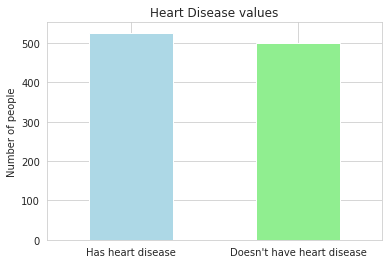

In [ ]:
fig = data.target.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen'])
fig.set_xticklabels(labels=['Has heart disease', "Doesn't have heart disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Number of people");

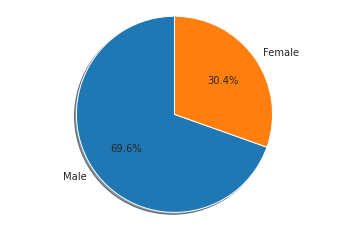

In [ ]:
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

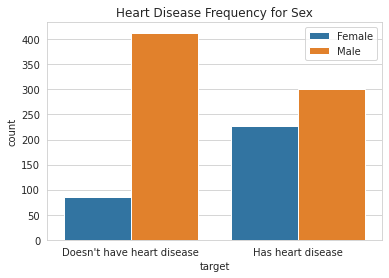

In [ ]:
fig = sns.countplot(x = 'target', data = data, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

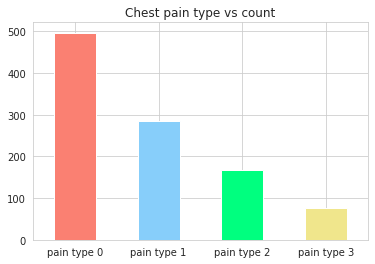

In [ ]:
fig = data.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

plt.title('Chest pain type vs count');

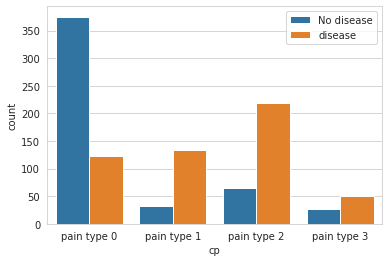

In [ ]:
fig = sns.countplot(x = 'cp', data = data, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

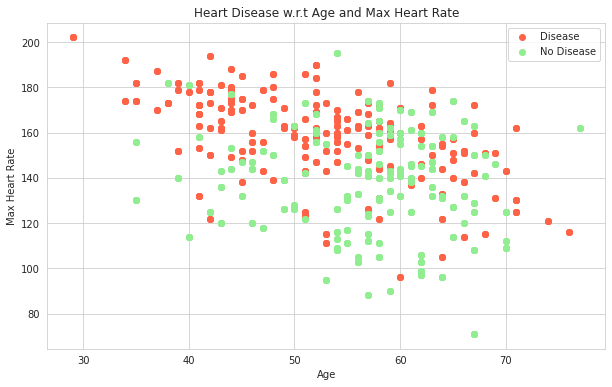

In [ ]:
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(data.age[data.target==1], 
            data.thalach[data.target==1], 
            c="tomato")

#plotting the values for people who doesn't have heart disease
plt.scatter(data.age[data.target==0], 
            data.thalach[data.target==0], 
            c="lightgreen")

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

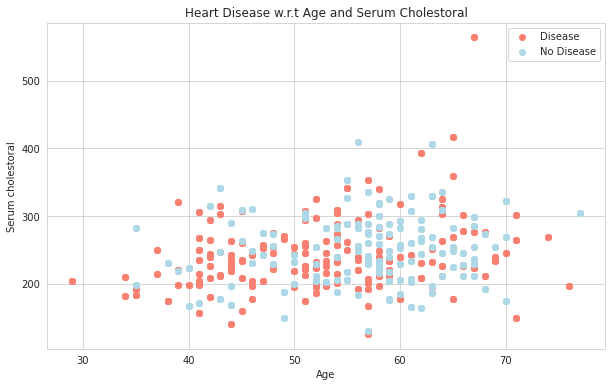

In [ ]:
df=data
# Creating another figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.chol[df.target==1], 
            c="salmon") # define it as a scatter figure

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.chol[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease w.r.t Age and Serum Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum cholestoral");

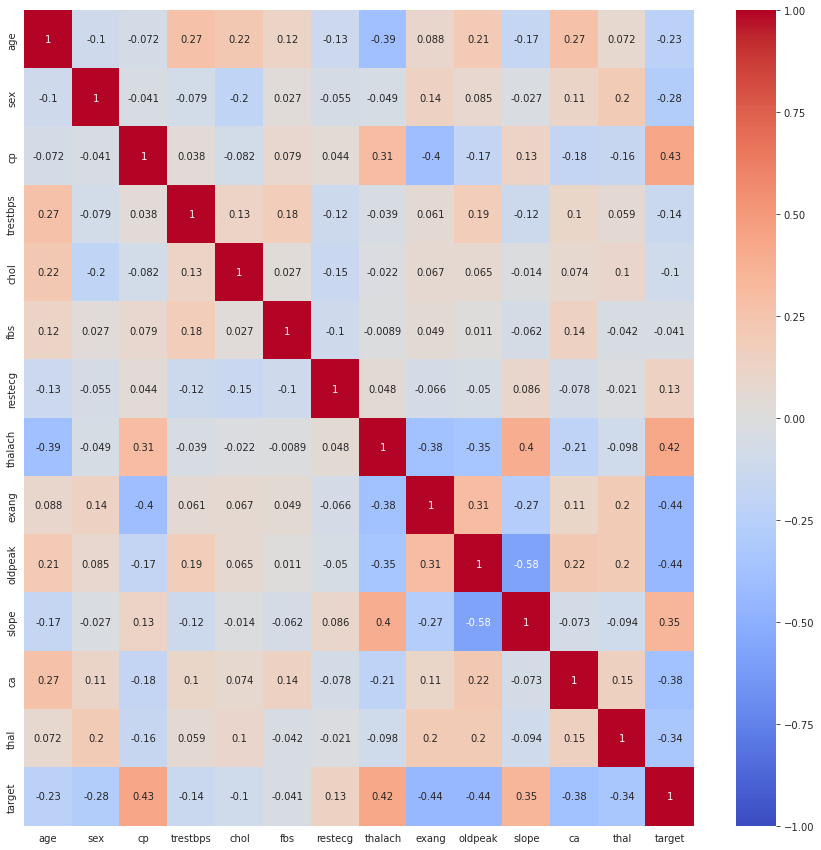

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

#**DATA PRE-PROCESSING**

**Dataset into dependent and independent features**

In [ ]:
y = data["target"]
X = data.drop('target',axis=1)


**STANDARDIZATION OF INDEPENDENT VARIABLES**

In [ ]:
cols=X.columns
for col in cols:
   X[col]=minmax_scale(X[col])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


**DIVIDING DATASET INTO TESTING AND TRAINING**



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)


**AS ALL DATA IS NUMERICAL AND NO CATEGORICAL DATA IS PRESENT WE WONT NEED TO NEED TO ENCODE CATEGORICAL DATA.**

**Before applying algorithm we should check whether the training data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem**

In [ ]:
Counter(y_train)

Counter({0: 322, 1: 344})

# **Model prepration and evaluation**

 **ML models**

Here I take different machine learning algorithm and try to find algorithm which predict accurately.

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine
8. Stacking classifier













**Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[141  36]
 [ 17 165]]


Accuracy of Logistic Regression: 85.23676880222841 

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       177
           1       0.82      0.91      0.86       182

    accuracy                           0.85       359
   macro avg       0.86      0.85      0.85       359
weighted avg       0.86      0.85      0.85       359



**Naive Bayes**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[139  38]
 [ 25 157]]


Accuracy of Naive Bayes model: 82.45125348189416 

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       177
           1       0.81      0.86      0.83       182

    accuracy                           0.82       359
   macro avg       0.83      0.82      0.82       359
weighted avg       0.83      0.82      0.82       359



**Random Forest Classifier**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[154  23]
 [ 15 167]]


Accuracy of Random Forest: 89.41504178272982 

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       177
           1       0.88      0.92      0.90       182

    accuracy                           0.89       359
   macro avg       0.90      0.89      0.89       359
weighted avg       0.89      0.89      0.89       359



**XG Boost**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[167  10]
 [ 15 167]]


Accuracy of Extreme Gradient Boost: 93.03621169916435 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       177
           1       0.94      0.92      0.93       182

    accuracy                           0.93       359
   macro avg       0.93      0.93      0.93       359
weighted avg       0.93      0.93      0.93       359



**KNN**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[158  19]
 [ 28 154]]


Accuracy of K-NeighborsClassifier: 86.90807799442896 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       177
           1       0.89      0.85      0.87       182

    accuracy                           0.87       359
   macro avg       0.87      0.87      0.87       359
weighted avg       0.87      0.87      0.87       359



**Decision Tree**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[156  21]
 [ 16 166]]


Accuracy of DecisionTreeClassifier: 89.69359331476323 

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       177
           1       0.89      0.91      0.90       182

    accuracy                           0.90       359
   macro avg       0.90      0.90      0.90       359
weighted avg       0.90      0.90      0.90       359



**Support Vector Classifier**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
m7 = 'Support Vector Classifier'
svc =  SVC()
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[154  23]
 [ 23 159]]


Accuracy of Support Vector Classifier: 87.1866295264624 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       177
           1       0.87      0.87      0.87       182

    accuracy                           0.87       359
   macro avg       0.87      0.87      0.87       359
weighted avg       0.87      0.87      0.87       359



**Stacking classifier**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
estimators = [('rf', RandomForestClassifier(max_depth=5)),('svr' ,LinearSVC())]
scv = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[159  18]
 [ 18 164]]


Accuracy of StackingClassifier: 89.97214484679665 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       177
           1       0.90      0.90      0.90       182

    accuracy                           0.90       359
   macro avg       0.90      0.90      0.90       359
weighted avg       0.90      0.90      0.90       359



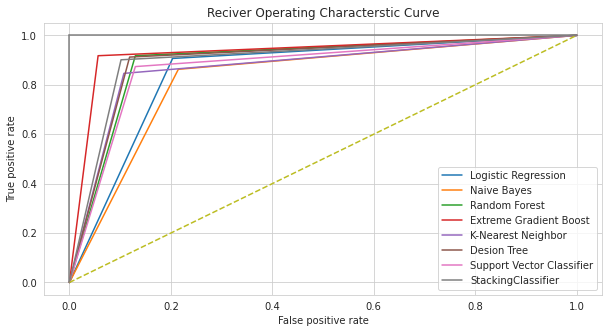

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
scv_false_positive_rate,scv_true_positive_rate,scv_threshold = roc_curve(y_test,scv_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(scv_false_positive_rate,scv_true_positive_rate,label='StackingClassifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine','StackingClassifier'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100,scv_acc_score*100]})
model_ev.sort_values("Accuracy", axis = 0, ascending = True,
                 inplace = True, na_position ='last')

model_ev

,Model,Accuracy
1,Naive Bayes,82.451253
0,Logistic Regression,85.236769
4,K-Nearest Neighbour,86.908078
6,Support Vector Machine,87.186630
2,Random Forest,89.415042
5,Decision Tree,89.693593
7,StackingClassifier,89.972145
3,Extreme Gradient Boost,93.036212


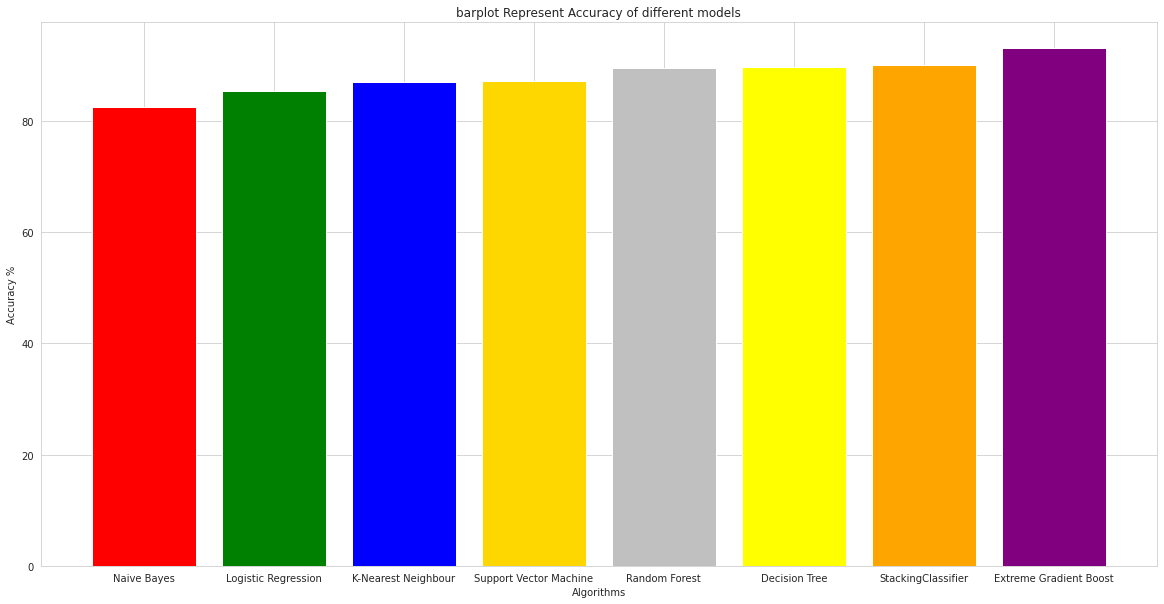

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange','purple']
plt.figure(figsize=(20,10))
plt.title("barplot Represent Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

**CONCLUSION:In general ensembling algorithms perform better than the other.**

##K-CROSS VALIDATION FOR BEST 4 ALGORITHUM

**Testing best four Algorithum in k fold cross validation for overfitting**

In [ ]:
TOP4=[]

**Decision Tree**

In [ ]:
acc1=[]


kf=KFold(n_splits=3)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  
  dt.fit(X_train,y_train)
  y_pred = dt.predict(X_test)

  acc1.append(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
print("acc:",sum(acc1)*100/len(acc1))
TOP4.append(sum(acc1)*100/len(acc1))    

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       158
           1       0.93      0.90      0.91       184

    accuracy                           0.91       342
   macro avg       0.91      0.91      0.91       342
weighted avg       0.91      0.91      0.91       342

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       170
           1       0.87      0.93      0.90       172

    accuracy                           0.90       342
   macro avg       0.90      0.90      0.90       342
weighted avg       0.90      0.90      0.90       342

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       171
           1       0.83      0.96      0.89       170

    accuracy                           0.88       341
   macro avg       0.89      0.88      0.88       341
weighted avg       0.89      0.88      0.88       341

acc: 89.46196543819

**Random Forest**

In [ ]:
acc2=[]


kf=KFold(n_splits=3)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  
  rf.fit(X_train,y_train)
  y_pred = rf.predict(X_test)

  acc2.append(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
print("acc:",sum(acc2)*100/len(acc2))
TOP4.append(sum(acc2)*100/len(acc2))    

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       158
           1       0.92      0.99      0.96       184

    accuracy                           0.95       342
   macro avg       0.96      0.95      0.95       342
weighted avg       0.96      0.95      0.95       342

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       170
           1       0.89      0.95      0.92       172

    accuracy                           0.91       342
   macro avg       0.91      0.91      0.91       342
weighted avg       0.91      0.91      0.91       342

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       171
           1       0.90      0.91      0.90       170

    accuracy                           0.90       341
   macro avg       0.90      0.90      0.90       341
weighted avg       0.90      0.90      0.90       341

acc: 92.19301103851

**Stacking classifier**

In [ ]:
acc=[]


kf=KFold(n_splits=3)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  
  scv.fit(X_train,y_train)
  y_pred = scv.predict(X_test)

  acc.append(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
print("acc:",sum(acc)*100/len(acc))
TOP4.append(sum(acc)*100/len(acc))  

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       158
           1       0.94      0.98      0.96       184

    accuracy                           0.95       342
   macro avg       0.96      0.95      0.95       342
weighted avg       0.95      0.95      0.95       342

              precision    recall  f1-score   support

           0       0.95      0.86      0.91       170
           1       0.88      0.96      0.92       172

    accuracy                           0.91       342
   macro avg       0.92      0.91      0.91       342
weighted avg       0.92      0.91      0.91       342

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       171
           1       0.88      0.91      0.89       170

    accuracy                           0.89       341
   macro avg       0.89      0.89      0.89       341
weighted avg       0.89      0.89      0.89       341

acc: 91.89975590654

**Xtreme gradient boosting**

In [ ]:
acc3=[]


kf=KFold(n_splits=3)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  
  xgb.fit(X_train,y_train)
  y_pred = xgb.predict(X_test)

  acc3.append(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
print("acc:",sum(acc3)*100/len(acc3))
TOP4.append(sum(acc3)*100/len(acc3)) 

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       158
           1       0.97      0.96      0.97       184

    accuracy                           0.96       342
   macro avg       0.96      0.97      0.96       342
weighted avg       0.97      0.96      0.96       342

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       170
           1       0.91      0.96      0.93       172

    accuracy                           0.93       342
   macro avg       0.93      0.93      0.93       342
weighted avg       0.93      0.93      0.93       342

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       171
           1       0.92      0.92      0.92       170

    accuracy                           0.92       341
   macro avg       0.92      0.92      0.92       341
weighted avg       0.92      0.92      0.92       341

acc: 94.04714948008

In [ ]:
model_ev = pd.DataFrame({'Model': ['Decision Tree','Random Forest','StackingClassifier','Extreme Gradient Boost'], 'Accuracy': [TOP4[0],TOP4[1],TOP4[2],TOP4[3]]})
model_ev.sort_values("Accuracy", axis = 0, ascending = True,
                 inplace = True, na_position ='last')
model_ev

,Model,Accuracy
0,Decision Tree,89.461965
2,StackingClassifier,91.899756
1,Random Forest,92.193011
3,Extreme Gradient Boost,94.047149


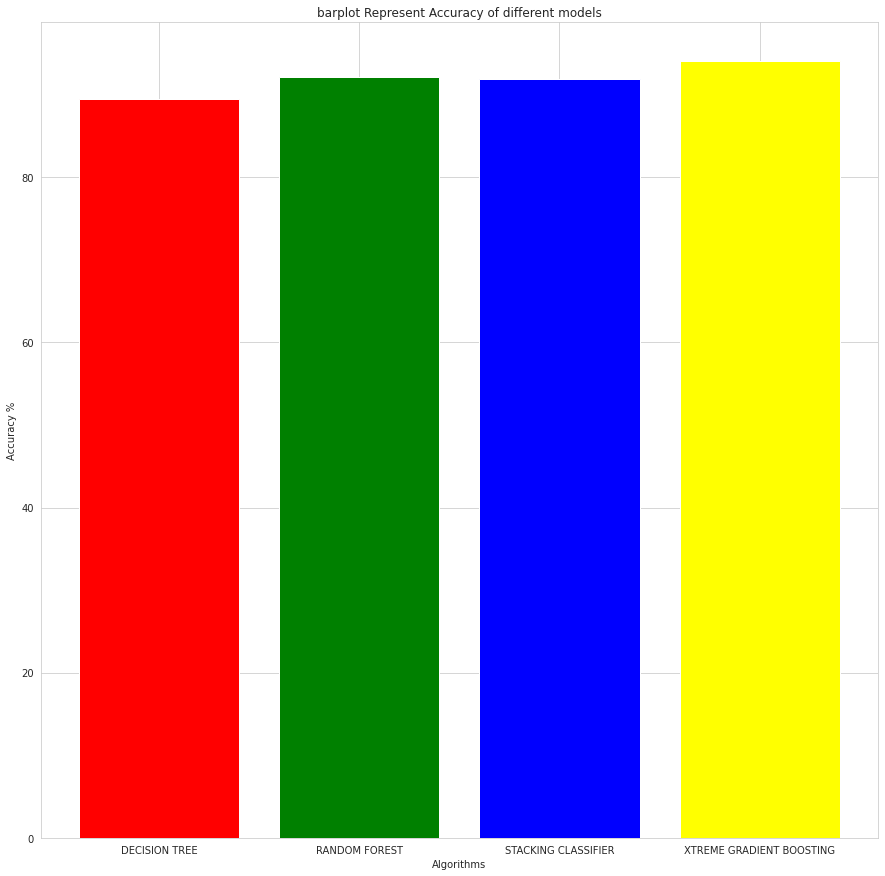

In [ ]:
colors = ['red','green','blue','yellow']
plt.figure(figsize=(15,15))
plt.title("barplot Represent Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.bar(["DECISION TREE","RANDOM FOREST","STACKING CLASSIFIER","XTREME GRADIENT BOOSTING"],TOP4,color = colors)
plt.show()

**Xtreme Gradient Boosting show the best result from the top 4**

#**Feature selection**

**Feature importance-XG Boost**

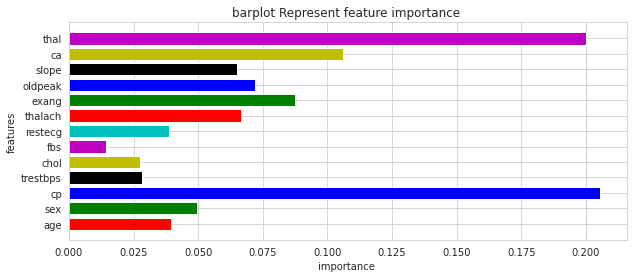

In [ ]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

**Conclusion**

*  'fbs' has least importance in the boosting
*   'cp' and 'thal' have maximum inportance in the boosting 



**Let's drop the least important feature and see the impact on performance**

**Default dataset**

In [ ]:
y = data["target"]
X = data.drop(columns=['target'])
cols=X.columns
for col in cols:
   X[col]=minmax_scale(X[col])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [ ]:
acc1=[]
p1=[]
r1=[]
f1=[]
hmsc=[]
model=XGBClassifier(max_depth=3,n_estimators=350,learning_rate=0.1,min_child_weight=3,colsample_bytree=0.2,reg_lambda=4)

kf=KFold(n_splits=3,shuffle=False)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  acc1.append(accuracy_score(y_test,y_pred))
  p1.append(precision_score(y_test,y_pred))
  r1.append(recall_score(y_test,y_pred))
  f1.append(f1_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
print("acc:",sum(acc1)*100/len(acc1))
hmsc.extend((sum(acc1)*100/len(acc1),sum(p1)*100/len(p1),sum(r1)*100/len(r1),sum(f1)*100/len(f1)))
print(hmsc)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       158
           1       0.98      0.97      0.98       184

    accuracy                           0.97       342
   macro avg       0.97      0.97      0.97       342
weighted avg       0.97      0.97      0.97       342

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       170
           1       0.94      0.94      0.94       172

    accuracy                           0.94       342
   macro avg       0.94      0.94      0.94       342
weighted avg       0.94      0.94      0.94       342

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       171
           1       0.93      0.89      0.91       170

    accuracy                           0.91       341
   macro avg       0.92      0.91      0.91       341
weighted avg       0.92      0.91      0.91       341

acc: 94.24122378281

**Changed features**

In [ ]:
y = data["target"]
X = data.drop(columns=['target','fbs'])
cols=X.columns
for col in cols:
   X[col]=minmax_scale(X[col])
X

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [ ]:
acc1=[]
p1=[]
r1=[]
f1=[]
msc=[]
model=XGBClassifier(max_depth=3,n_estimators=350,learning_rate=0.1,min_child_weight=3,colsample_bytree=0.2,reg_lambda=4)

kf=KFold(n_splits=3,shuffle=False)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  acc1.append(accuracy_score(y_test,y_pred))
  p1.append(precision_score(y_test,y_pred))
  r1.append(recall_score(y_test,y_pred))
  f1.append(f1_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
print("acc:",sum(acc1)*100/len(acc1))
msc.extend((sum(acc1)*100/len(acc1),sum(p1)*100/len(p1),sum(r1)*100/len(r1),sum(f1)*100/len(f1)))
print(msc)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       158
           1       0.96      0.97      0.97       184

    accuracy                           0.96       342
   macro avg       0.97      0.96      0.96       342
weighted avg       0.96      0.96      0.96       342

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       170
           1       0.96      0.94      0.95       172

    accuracy                           0.95       342
   macro avg       0.95      0.95      0.95       342
weighted avg       0.95      0.95      0.95       342

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       171
           1       0.92      0.92      0.92       170

    accuracy                           0.92       341
   macro avg       0.92      0.92      0.92       341
weighted avg       0.92      0.92      0.92       341

acc: 94.53390726735

**Comparsion**

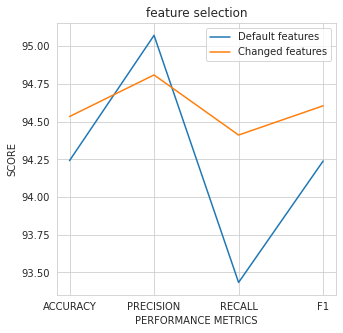

In [ ]:
head=["ACCURACY","PRECISION","RECALL","F1"]
plt.figure(figsize=(5,5))
plt.plot(head,hmsc,label="Default features")
plt.plot(head,msc,label="Changed features")
plt.title("feature selection")
plt.xlabel("PERFORMANCE METRICS")
plt.ylabel("SCORE")
plt.legend()
plt.show()

**LITTLE INCREASE PERFORMANCE DESPITE DROPPING A FEATURE**

**New Features for prediction**

In [ ]:
y = data["target"]
X = data.drop(columns=['target','fbs'])
cols=X.columns
for col in cols:
   X[col]=minmax_scale(X[col])


#**HYPER TUNNING OF PARARMETER**





##XG Boost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**MAX DEPTH**

>2, train: 0.937, test: 0.891
>3, train: 0.986, test: 0.919
>4, train: 1.000, test: 0.955
>5, train: 1.000, test: 0.967
>6, train: 1.000, test: 0.967
>7, train: 1.000, test: 0.967
>8, train: 1.000, test: 0.967
>9, train: 1.000, test: 0.967
>10, train: 1.000, test: 0.967


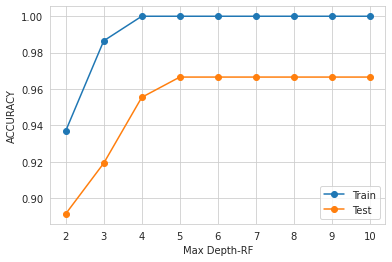

In [ ]:
trs=[]
tes=[]
values = [i for i in range(2, 11)]


for i in values:

	model= XGBClassifier(max_depth=i)

	model.fit(X_train, y_train)

	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	trs.append(train_acc)

	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	tes.append(test_acc)

	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.ylabel("ACCURACY")
plt.xlabel("Max Depth-RF")
plt.plot(values, trs, '-o', label='Train')
plt.plot(values, tes, '-o', label='Test')
plt.legend()
plt.show()

**N-Estimators**

>50, train: 0.961, test: 0.914
>150, train: 0.995, test: 0.936
>250, train: 1.000, test: 0.955
>350, train: 1.000, test: 0.955
>450, train: 1.000, test: 0.955
>550, train: 1.000, test: 0.955
>650, train: 1.000, test: 0.947
>750, train: 1.000, test: 0.947
>850, train: 1.000, test: 0.947
>950, train: 1.000, test: 0.947
>1050, train: 1.000, test: 0.947


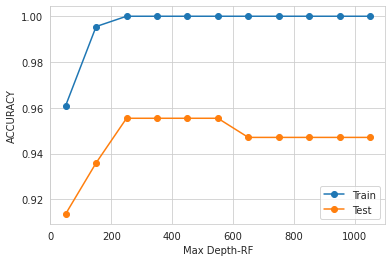

In [ ]:
trs=[]
tes=[]
values = [i for i in range(50,1051,100)]


for i in values:

	model= XGBClassifier(max_depth=3,n_estimators=i)

	model.fit(X_train, y_train)

	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	trs.append(train_acc)

	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	tes.append(test_acc)

	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.ylabel("ACCURACY")
plt.xlabel("Max Depth-RF")
plt.plot(values, trs, '-o', label='Train')
plt.plot(values, tes, '-o', label='Test')
plt.legend()
plt.show()

**LEARNING RATE**

>0.01, train: 0.949, test: 0.894
>0.02, train: 0.974, test: 0.905
>0.03, train: 0.986, test: 0.919
>0.04, train: 0.995, test: 0.936
>0.05, train: 0.997, test: 0.944
>0.06, train: 0.998, test: 0.950
>0.07, train: 0.998, test: 0.950
>0.08, train: 1.000, test: 0.955
>0.09, train: 1.000, test: 0.955
>0.10, train: 1.000, test: 0.955
>0.11, train: 1.000, test: 0.955
>0.12, train: 1.000, test: 0.955
>0.13, train: 1.000, test: 0.955
>0.14, train: 1.000, test: 0.947


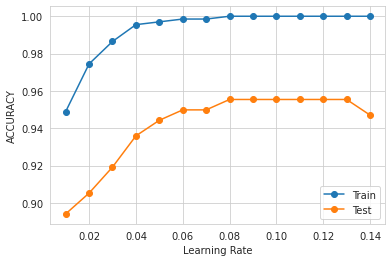

In [ ]:
trs=[]
tes=[]
values=[i for  i in np.arange(0.01,0.15,0.01)]


for i in values:

	model= XGBClassifier(max_depth=3,n_estimators=350,learning_rate=i)

	model.fit(X_train, y_train)

	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	trs.append(train_acc)

	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	tes.append(test_acc)

	print('>%.2f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.ylabel("ACCURACY")
plt.xlabel("Learning Rate")
plt.plot(values, trs, '-o', label='Train')
plt.plot(values, tes, '-o', label='Test')
plt.legend()
plt.show()

**MIN CHILD WEIGHT**

>0, train: 1.000, test: 0.955
>1, train: 1.000, test: 0.955
>2, train: 1.000, test: 0.955
>3, train: 0.998, test: 0.942
>4, train: 0.997, test: 0.936
>5, train: 0.998, test: 0.950
>6, train: 0.995, test: 0.939
>7, train: 0.995, test: 0.942
>8, train: 0.989, test: 0.936
>9, train: 0.974, test: 0.922


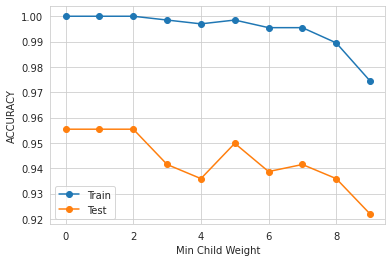

In [ ]:
trs=[]
tes=[]
values=[i for  i in np.arange(0,10,1)]


for i in values:

	model= XGBClassifier(max_depth=3,n_estimators=350,learning_rate=0.1,min_child_weight=i)

	model.fit(X_train, y_train)

	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	trs.append(train_acc)

	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	tes.append(test_acc)

	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.ylabel("ACCURACY")
plt.xlabel("Min Child Weight")
plt.plot(values, trs, '-o', label='Train')
plt.plot(values, tes, '-o', label='Test')
plt.legend()
plt.show()

**Col sample by tree**

>0.00, train: 0.959, test: 0.925
>0.10, train: 0.959, test: 0.925
>0.20, train: 0.995, test: 0.950
>0.30, train: 0.997, test: 0.944
>0.40, train: 0.998, test: 0.950
>0.50, train: 0.998, test: 0.950
>0.60, train: 0.998, test: 0.950
>0.70, train: 0.998, test: 0.950
>0.80, train: 0.998, test: 0.950
>0.90, train: 0.998, test: 0.942


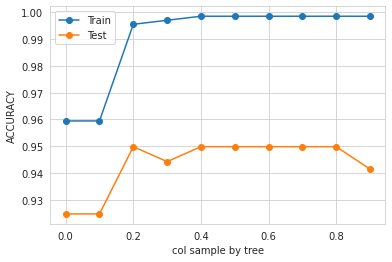

In [ ]:
trs=[]
tes=[]
values=[i for  i in np.arange(0,1,0.1)]


for i in values:

	model= XGBClassifier(max_depth=3,n_estimators=350,learning_rate=0.1,min_child_weight=3,colsample_bytree=i)

	model.fit(X_train, y_train)

	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	trs.append(train_acc)

	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	tes.append(test_acc)

	print('>%.2f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.ylabel("ACCURACY")
plt.xlabel("col sample by tree")
plt.plot(values, trs, '-o', label='Train')
plt.plot(values, tes, '-o', label='Test')
plt.legend()
plt.show()

**Lambda**

>0.00, train: 0.995, test: 0.950
>1.00, train: 0.995, test: 0.950
>2.00, train: 0.992, test: 0.947
>3.00, train: 0.989, test: 0.944
>4.00, train: 0.985, test: 0.942
>5.00, train: 0.985, test: 0.942
>6.00, train: 0.982, test: 0.939
>7.00, train: 0.979, test: 0.933
>8.00, train: 0.982, test: 0.939
>9.00, train: 0.979, test: 0.933


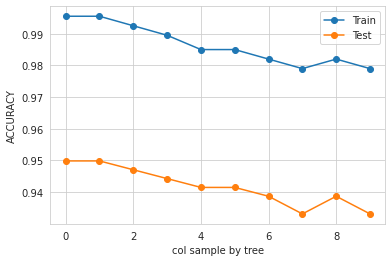

In [ ]:
trs=[]
tes=[]
values=[i for  i in np.arange(0,10,1)]


for i in values:

	model= XGBClassifier(max_depth=3,n_estimators=350,learning_rate=0.1,min_child_weight=3,colsample_bytree=0.2,reg_lambda=i)

	model.fit(X_train, y_train)

	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	trs.append(train_acc)

	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	tes.append(test_acc)

	print('>%.2f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.ylabel("ACCURACY")
plt.xlabel("col sample by tree")
plt.plot(values, trs, '-o', label='Train')
plt.plot(values, tes, '-o', label='Test')
plt.legend()
plt.show()

#**COMPARSION BETWEEN HYPERTUNED AND DEFAULT XG BOOSTING**

##**HOLD OUT**

**DEFAULT**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)

In [ ]:
fmodel=XGBClassifier()
fmodel.fit(X_train,y_train)
y_pred=fmodel.predict(X_test)

In [ ]:
msc=[]
print("For default XG BOOST model:")
print("ACCURACY:",accuracy_score(y_test,y_pred)*100)
print("PRECISION:",precision_score(y_test,y_pred)*100)
print("RECALL:",recall_score(y_test,y_pred,)*100)
print("F1:",f1_score(y_test,y_pred,)*100)
msc.extend((accuracy_score(y_test,y_pred)*100,precision_score(y_test,y_pred)*100,recall_score(y_test,y_pred,)*100,f1_score(y_test,y_pred,)*100))

For default XG BOOST model:
ACCURACY: 91.92200557103064
PRECISION: 92.26519337016575
RECALL: 91.75824175824175
F1: 92.01101928374656


**HYPERTUNED**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
fmodel=XGBClassifier(max_depth=3,n_estimators=350,learning_rate=0.1,min_child_weight=3,colsample_bytree=0.2,reg_lambda=4)
fmodel.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.2, min_child_weight=3, n_estimators=350,
              reg_lambda=4)

In [ ]:
hmsc=[]
y_pred=fmodel.predict(X_test)
print("For hyper tuned XG BOOST model")
print("Testing dataset:")
print("ACCURACY:",accuracy_score(y_test,y_pred)*100)
print("PRECISION:",precision_score(y_test,y_pred)*100)
print("RECALL:",recall_score(y_test,y_pred,)*100)
print("F1:",f1_score(y_test,y_pred,)*100)
hmsc.extend((accuracy_score(y_test,y_pred)*100,precision_score(y_test,y_pred)*100,recall_score(y_test,y_pred,)*100,f1_score(y_test,y_pred,)*100))

For hyper tuned XG BOOST model
Testing dataset:
ACCURACY: 94.15041782729804
PRECISION: 94.97206703910615
RECALL: 93.4065934065934
F1: 94.18282548476455


**Comparsion**

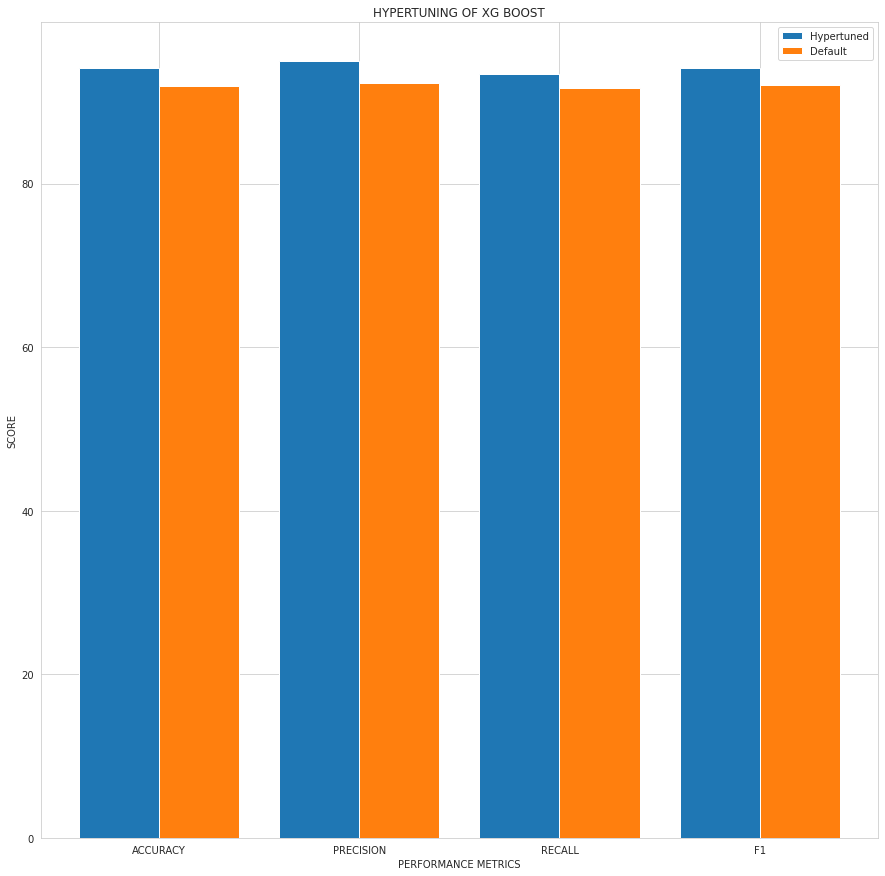

In [ ]:
head=["ACCURACY","PRECISION","RECALL","F1"]
ind= np.arange(len(head))
plt.figure(figsize=(15,15))
plt.bar(ind-0.2,hmsc,0.4,label="Hypertuned")
plt.bar(ind+0.2,msc,0.4,label="Default")
plt.title("HYPERTUNING OF XG BOOST")
plt.xlabel("PERFORMANCE METRICS")
plt.xticks(ind,head)
plt.ylabel("SCORE")
plt.legend()
plt.show()

##**KFOLD**

**DEFAULT-K FOLD**

In [ ]:
acc2=[]
dms=[]
p1=[]
r1=[]
f1=[]


kf=KFold(n_splits=3)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  
  xgb.fit(X_train,y_train)
  y_pred = xgb.predict(X_test)
  acc2.append(accuracy_score(y_test,y_pred))
  p1.append(precision_score(y_test,y_pred))
  r1.append(recall_score(y_test,y_pred))
  f1.append(f1_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
print("acc:",sum(acc2)*100/len(acc2))
dms.extend((sum(acc2)*100/len(acc2),sum(p1)*100/len(p1),sum(r1)*100/len(r1),sum(f1)*100/len(f1)))
    

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       158
           1       0.97      0.96      0.96       184

    accuracy                           0.96       342
   macro avg       0.96      0.96      0.96       342
weighted avg       0.96      0.96      0.96       342

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       170
           1       0.91      0.96      0.93       172

    accuracy                           0.93       342
   macro avg       0.93      0.93      0.93       342
weighted avg       0.93      0.93      0.93       342

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       171
           1       0.93      0.92      0.93       170

    accuracy                           0.93       341
   macro avg       0.93      0.93      0.93       341
weighted avg       0.93      0.93      0.93       341

acc: 94.04743530380

**HYPERTUNED K-FOLD**

In [ ]:
acc1=[]
p1=[]
r1=[]
f1=[]
hmsc=[]
model=XGBClassifier(max_depth=3,n_estimators=350,learning_rate=0.1,min_child_weight=3,colsample_bytree=0.2,reg_lambda=4)

kf=KFold(n_splits=3,shuffle=True,random_state=10)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  acc1.append(accuracy_score(y_test,y_pred))
  p1.append(precision_score(y_test,y_pred))
  r1.append(recall_score(y_test,y_pred))
  f1.append(f1_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
print("acc:",sum(acc1)*100/len(acc1))
hmsc.extend((sum(acc1)*100/len(acc1),sum(p1)*100/len(p1),sum(r1)*100/len(r1),sum(f1)*100/len(f1)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       167
           1       0.95      0.93      0.94       175

    accuracy                           0.94       342
   macro avg       0.94      0.94      0.94       342
weighted avg       0.94      0.94      0.94       342

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       171
           1       0.94      0.95      0.94       171

    accuracy                           0.94       342
   macro avg       0.94      0.94      0.94       342
weighted avg       0.94      0.94      0.94       342

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       161
           1       0.96      0.97      0.96       180

    accuracy                           0.96       341
   macro avg       0.96      0.96      0.96       341
weighted avg       0.96      0.96      0.96       341

acc: 94.73284057324

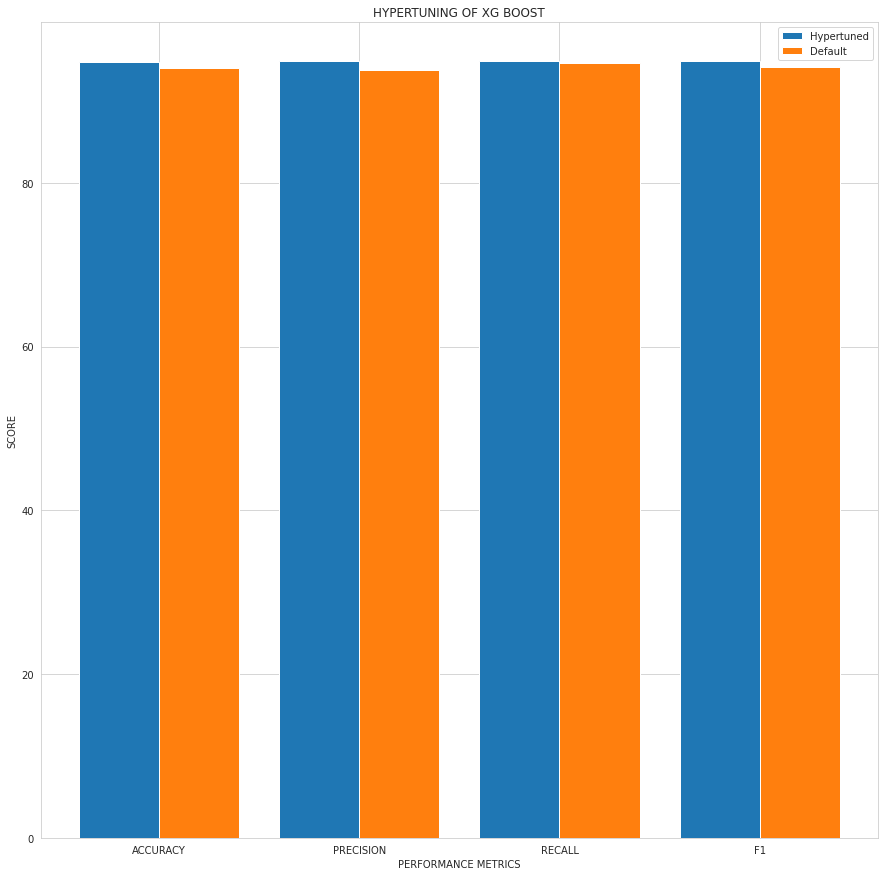

In [ ]:
head=["ACCURACY","PRECISION","RECALL","F1"]
ind= np.arange(len(head))
plt.figure(figsize=(15,15))
plt.bar(ind-0.2,hmsc,0.4,label="Hypertuned")
plt.bar(ind+0.2,dms,0.4,label="Default")
plt.title("HYPERTUNING OF XG BOOST")
plt.xlabel("PERFORMANCE METRICS")
plt.xticks(ind,head)
plt.ylabel("SCORE")
plt.legend()
plt.show()

#**Checking overfitting**

In [ ]:
y = data["target"]
new_x = data.drop(columns=['target','fbs'],axis=1)
cols=new_x.columns
for col in cols:
   new_x[col]=minmax_scale(new_x[col])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.35, random_state =10)
fmodel=XGBClassifier(max_depth=3,n_estimators=350,learning_rate=0.1,min_child_weight=3,colsample_bytree=0.2,reg_lambda=4)
fmodel.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.2, min_child_weight=3, n_estimators=350,
              reg_lambda=4)

In [ ]:
y_pred=fmodel.predict(X_test)
print("For hyper tuned XG BOOST model")
print("Testing dataset:")
print("ACCURACY:",accuracy_score(y_test,y_pred)*100)
print("PRECISION:",precision_score(y_test,y_pred)*100)
print("RECALL:",recall_score(y_test,y_pred,)*100)
print("F1:",f1_score(y_test,y_pred,)*100)

For hyper tuned XG BOOST model
Testing dataset:
ACCURACY: 94.15041782729804
PRECISION: 94.97206703910615
RECALL: 93.4065934065934
F1: 94.18282548476455


In [ ]:
y_pred=fmodel.predict(X_train)
print("For hyper tuned XG BOOST model")
print("Training dataset:")
print("ACCURACY:",accuracy_score(y_train,y_pred)*100)
print("PRECISION:",precision_score(y_train,y_pred)*100)
print("RECALL:",recall_score(y_train,y_pred,)*100)
print("F1:",f1_score(y_train,y_pred,)*100)

For hyper tuned XG BOOST model
Training dataset:
ACCURACY: 98.49849849849849
PRECISION: 99.11764705882354
RECALL: 97.96511627906976
F1: 98.53801169590642


#**Prediction and final model**

In [ ]:
y = data["target"]
X= data.drop(['target','fbs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =8,)
fmodel=XGBClassifier(max_depth=3,n_estimators=350,learning_rate=0.1,min_child_weight=3,colsample_bytree=0.2,reg_lambda=4)
fmodel.fit(X_train,y_train)


XGBClassifier(colsample_bytree=0.2, min_child_weight=3, n_estimators=350,
              reg_lambda=4)

> **Attribute Information**
> * Age (age in years)
> * Sex (1 = male; 0 = female)
> * CP (chest pain type)
> * TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
> * CHOL (serum cholestoral in mg/dl)
> * RESTECH (resting electrocardiographic results)
> * THALACH (maximum heart rate achieved)
> * EXANG (exercise induced angina (1 = yes; 0 = no))
> * OLDPEAK (ST depression induced by exercise relative to rest)
> * SLOPE (the slope of the peak exercise ST segment)
> * CA (number of major vessels (0-3) colored by flourosopy)
> * THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)


In [ ]:
#input the value in order as shown above all can be input in form of interger values
sample =[[52,1,0,125,212,1,168,0,1,2,2,3]]
out1= pd.DataFrame(sample, columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])
y_pred=fmodel.predict(out1)
if(y_pred==1):
  print("RISK OF HEART DISEASE")
else:
  print("NO RISK OF HEART DISEASE")

NO RISK OF HEART DISEASE
